# WeatherPy
----

#### Abstract
In this observational study we are looking into correlations of High Temperature, Humidity, Cloudiness and Wind Speed with the latitude. As the data points for the measurements we use weather reports in more than 500 cities around the globe.

#### Observations
1. The only strong correlation is found in daily high temperatures against the latitude. The highest highs are around the equator ($ 80^o-90^o F $ in some cities) and gradually drop toward the poles all the way to $0^oF$ at $60^oNorth$.
2. The other measurments (Humidity, Cloudiness and Wind Speed) all have no strong correlation with the latitude ($r^2<0.1$).
3. The wind speed on the day of the study (see titles on the plots) was mostly under 12MPH except a few outliers in the North. That's about it about the wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_data = []

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# CAUTION This cell makes a series of HTTP requests to the API
# Try to skip this step as much as possible
run_api=False

url = "http://api.openweathermap.org/data/2.5/weather?"
batch_size = 20
start_city = 20
weather_buffer = []

for start_city in range(0, len(cities), batch_size):
    print(f"Batch starting at {start_city}")

    for city in cities[start_city:(start_city+batch_size)]:
        print(f"  Processing '{city}''", end="")
        if not run_api:
            print(" ...skipped")
            continue

        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        # Get weather data
        try:
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            if weather_json["cod"] == 200:
                weather_buffer.append(weather_json)
                print(" ...OK")
            else:
                print(f" ...FAIL, return code: {weather_json['cod']}")
        except:
            print(" ...Something went terribly wrong")

if run_api:
    weather_data = weather_buffer

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
len(weather_buffer)

Batch starting at 0
  Processing 'mys shmidta'' ...skipped
  Processing 'bluff'' ...skipped
  Processing 'taolanaro'' ...skipped
  Processing 'buala'' ...skipped
  Processing 'forestville'' ...skipped
  Processing 'esperance'' ...skipped
  Processing 'belushya guba'' ...skipped
  Processing 'kaitangata'' ...skipped
  Processing 'hofn'' ...skipped
  Processing 'rikitea'' ...skipped
  Processing 'georgetown'' ...skipped
  Processing 'vaini'' ...skipped
  Processing 'tuatapere'' ...skipped
  Processing 'albany'' ...skipped
  Processing 'bolungarvik'' ...skipped
  Processing 'new norfolk'' ...skipped
  Processing 'mar del plata'' ...skipped
  Processing 'lubao'' ...skipped
  Processing 'atuona'' ...skipped
  Processing 'broome'' ...skipped
Batch starting at 20
  Processing 'butaritari'' ...skipped
  Processing 'wanaka'' ...skipped
  Processing 'jalu'' ...skipped
  Processing 'clyde river'' ...skipped
  Processing 'verkhoyansk'' ...skipped
  Processing 'saskylakh'' ...skipped
  Processing '

0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#City          550
#Lat           550
#Lng           550
#Max Temp      550
#Humidity      550
#Cloudiness    550
#Wind Speed    550
#Country       550
#Date          550
df_cities = pd.DataFrame()
if run_api:
    for one_city in weather_data:
        #print(one_city["name"])
        row = {
            "City": one_city["name"],
            "Lat":  one_city["coord"]["lat"],
            "Lon":  one_city["coord"]["lon"],
            "Max Temp": one_city["main"]["temp_max"],
            "Humidity": one_city["main"]["humidity"],
            "Cloudiness": one_city["clouds"]["all"],
            "Wind Speed": one_city["wind"]["speed"],
            "Country": one_city["sys"]["country"],
            "Date": one_city["dt"]
        }
        df_cities = df_cities.append(row, ignore_index=True)
    df_cities.to_csv(output_data_file)
else:
    df_cities = pd.read_csv(output_data_file)

df_cities

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,0,New Norfolk,58.0,AU,1.587163e+09,77.0,-42.78,147.06,285.37,1.34
1,1,Souillac,40.0,MU,1.587163e+09,83.0,-20.52,57.52,297.59,4.10
2,2,Saldanha,58.0,ZA,1.587163e+09,72.0,-33.01,17.94,288.15,4.10
3,3,Hilo,40.0,US,1.587163e+09,54.0,19.73,-155.09,300.15,4.10
4,4,St. Pete Beach,1.0,US,1.587163e+09,65.0,27.73,-82.74,302.04,3.10
...,...,...,...,...,...,...,...,...,...,...
548,548,La Macarena,88.0,CO,1.587163e+09,88.0,2.18,-73.78,296.23,1.45
549,549,Tucuruí,100.0,BR,1.587163e+09,93.0,-3.77,-49.67,296.33,1.09
550,550,Sibolga,93.0,ID,1.587163e+09,79.0,1.74,98.78,298.28,1.91
551,551,Kloulklubed,90.0,PW,1.587163e+09,94.0,7.04,134.26,298.15,3.60


In [5]:
# Convert Kelvins to Fahrenheit, use formula from metric-conversions.org

df_cities["Max Temp"] = (df_cities["Max Temp"] - 273.15)* 1.8000 + 32.00
df_cities

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,0,New Norfolk,58.0,AU,1.587163e+09,77.0,-42.78,147.06,53.996,1.34
1,1,Souillac,40.0,MU,1.587163e+09,83.0,-20.52,57.52,75.992,4.10
2,2,Saldanha,58.0,ZA,1.587163e+09,72.0,-33.01,17.94,59.000,4.10
3,3,Hilo,40.0,US,1.587163e+09,54.0,19.73,-155.09,80.600,4.10
4,4,St. Pete Beach,1.0,US,1.587163e+09,65.0,27.73,-82.74,84.002,3.10
...,...,...,...,...,...,...,...,...,...,...
548,548,La Macarena,88.0,CO,1.587163e+09,88.0,2.18,-73.78,73.544,1.45
549,549,Tucuruí,100.0,BR,1.587163e+09,93.0,-3.77,-49.67,73.724,1.09
550,550,Sibolga,93.0,ID,1.587163e+09,79.0,1.74,98.78,77.234,1.91
551,551,Kloulklubed,90.0,PW,1.587163e+09,94.0,7.04,134.26,77.000,3.60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
df_cities.describe()

,Unnamed: 0,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
count,553.000000,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,276.000000,55.242315,1.587163e+09,71.569620,20.950542,22.770181,58.422242,3.553870
std,159.781622,35.200449,7.832077e+01,20.169641,33.852880,91.091846,21.027993,2.482134
min,0.000000,0.000000,1.587162e+09,4.000000,-54.800000,-175.200000,-5.494000,0.180000
25%,138.000000,20.000000,1.587163e+09,63.000000,-6.130000,-57.560000,42.782000,1.690000
50%,276.000000,61.000000,1.587163e+09,76.000000,23.600000,25.570000,60.998000,3.100000
75%,414.000000,90.000000,1.587163e+09,87.000000,50.700000,107.340000,77.000000,4.690000
max,552.000000,100.000000,1.587163e+09,100.000000,78.220000,179.320000,98.600000,15.900000


In [7]:
#  Get the indices of cities that have humidity over 100%.
df_cities[df_cities["Humidity"] > 100.0]

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df_clean_cities = df_cities.drop(df_cities[df_cities["Humidity"] > 100.0].index)

In [9]:
# Extract relevant fields from the data frame
df_clean_cities = df_clean_cities[["Lat", "Cloudiness", "Humidity", "Max Temp", "Wind Speed"]]

# Export the City_Data into a csv
df_clean_cities.to_csv("weather_clean_dataframe.csv")
df_clean_cities

,Lat,Cloudiness,Humidity,Max Temp,Wind Speed
0,-42.78,58.0,77.0,53.996,1.34
1,-20.52,40.0,83.0,75.992,4.10
2,-33.01,58.0,72.0,59.000,4.10
3,19.73,40.0,54.0,80.600,4.10
4,27.73,1.0,65.0,84.002,3.10
...,...,...,...,...,...
548,2.18,88.0,88.0,73.544,1.45
549,-3.77,100.0,93.0,73.724,1.09
550,1.74,93.0,79.0,77.234,1.91
551,7.04,90.0,94.0,77.000,3.60


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Take the latest date when the data was updated at the API for reporting on the charts

asof_date = time.strftime("%m/%d/%Y", time.gmtime(df_cities["Date"].max()))
asof_date

'04/17/2020'

## Latitude vs. Temperature Plot

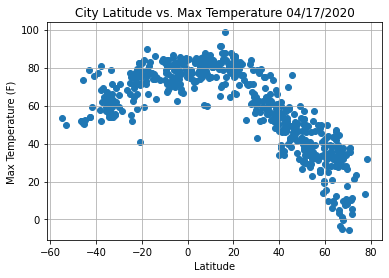

In [11]:
plt.title(f"City Latitude vs. Max Temperature {asof_date}")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/max_temp.png")
plt.show()

Latitude vs. Temperature plot (above) shows a clear trend of the temperature in the cities by their latitude. The highest temperature is about in the middle, at the Equator, which makes sense, and gradually decreases toward the poles. Also we can see that there are not that many cities closer to the South Pole even though we evenly randomized the seed locations in the beginning of this notebook. We used scatter plot so we can see where each city lands on the 2D plain of Latitude vs. Temperature.

## Latitude vs. Humidity Plot

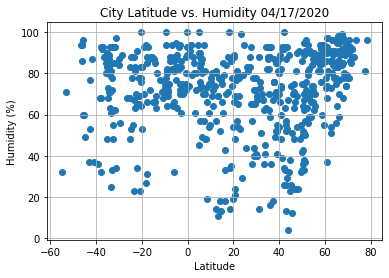

In [12]:
plt.title(f"City Latitude vs. Humidity {asof_date}")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/humidity.png")
plt.show()

Humidity plot shows less correlation between the humidity and the latitude. Yet we can see some elevated humidity in the northern cities. Again, we use scatter plot to show where each city lands on the 2D plain.

## Latitude vs. Cloudiness Plot

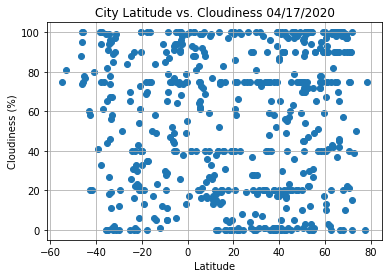

In [13]:
plt.title(f"City Latitude vs. Cloudiness {asof_date}")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/cloudiness.png")
plt.show()

Cloudiness distribution is even more "uniform" across the latitudes. No visual tendency can be observed on this scatter plot. Some horizontal clustering could be due to measurements (in)precision.

## Latitude vs. Wind Speed Plot

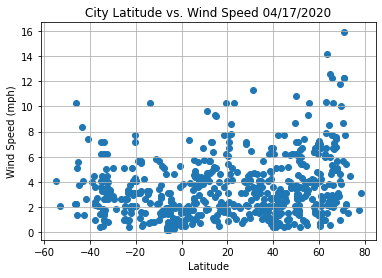

In [14]:
plt.title(f"City Latitude vs. Wind Speed {asof_date}")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/wind_speed.png")
plt.show()

Wind Speed is also somewhat uniform across latitudes with very slight increase toward the poles, more prominent toward the North Pole. Or it can be just a few a little more extreme outliers over there. It is hard to tell by just looking at this scatter plot visually.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def fit_plot(x, y, field, units, pngname):
    ann_x = x.min() + (x.max() - x.min())*0.3
    ann_y = y.min() + (y.max() - y.min())*0.1
    ann_r = y.min() + (y.max() - y.min())*0.05
    lreg = linregress(x, y)
    plt.title(f"City Latitude vs. {field} {asof_date}")
    plt.scatter(x, y, label="Original data")
    plt.plot(x, lreg.slope*x + lreg.intercept, color="red", label="Fitted line")
    plt.annotate(f"y = {lreg.slope:.2f} x Lat + {lreg.intercept:.2f}", xy=(ann_x,ann_y), color="red")
    plt.annotate(f"r-squared: {lreg.rvalue**2:.3f}", xy=(ann_x,ann_r), color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{field} ({units})")
    plt.grid(True)
    plt.savefig(f"output_data/{pngname}.png")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
df_northern = df_clean_cities[df_clean_cities["Lat"] >= 0]
df_southern = df_clean_cities[df_clean_cities["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

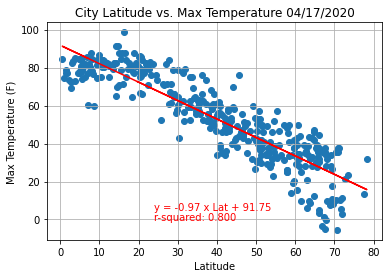

In [17]:
fit_plot(df_northern["Lat"], df_northern["Max Temp"], "Max Temperature", "F", "max_temp_north")

As it was observed with simple scatter plot the temperature in the Northern Hemisphere has a strong tendency to decrease when the latitude increases. We can prove it with linear regression (see the plot above). The r-squared value is 80% which indicates a very strong negative correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

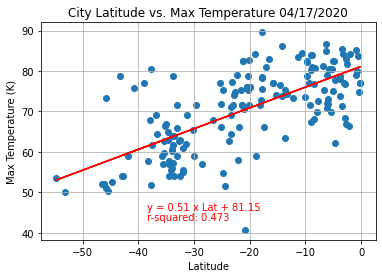

In [18]:
fit_plot(df_southern["Lat"], df_southern["Max Temp"], "Max Temperature", "K", "max_temp_south")

In the Southern Hemisphere, however, the correlation is not that strong, although the tendency is still very clear. The correlation in negative latitudes is positive (increase in latitude is reflected by the increase in temperature) but a bit weaker than in the Northern Hemisphere (the r-squared is only 0.47).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

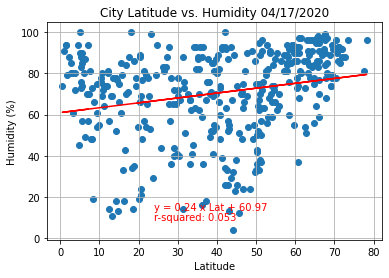

In [19]:
fit_plot(df_northern["Lat"], df_northern["Humidity"], "Humidity", "%", "humidity_north")

Humidity in the Northern Hemisphere has a weak positive correlation with the latitude, possibly due to clustering in the higher humidity on the North and the wide spread in the South. But the r-squared value is around 0.05 meaning a very weak correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

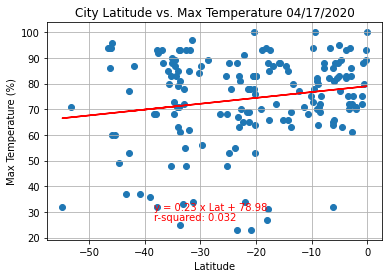

In [20]:
fit_plot(df_southern["Lat"], df_southern["Humidity"], "Max Temperature", "%", "humidity_south")

Humidity in the Southern Hemisphere is also very weak ($ r^2 = 0.032 $). And the correlation is positive too like in the Northern Hemisphere. The weakness of the correlation and low slope of the linear regression both suggest that if any tendencies can be observed in humidity on the planet they likely are due to some random fluctuations, probably seasonal.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

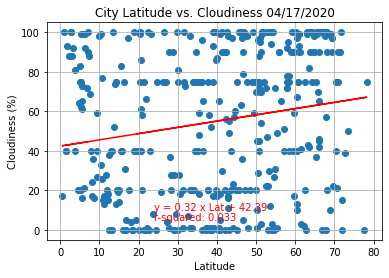

In [21]:
fit_plot(df_northern["Lat"], df_northern["Cloudiness"], "Cloudiness", "%", "cloudiness_north")

Somewhat significant slope of the linear regression looks a bit surprising on this visually uniform Coudiness distribution over the latitudes in the Northern Hemisphere. However, the r-squared = 0.033 which is very low. We can dismiss this kind of correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

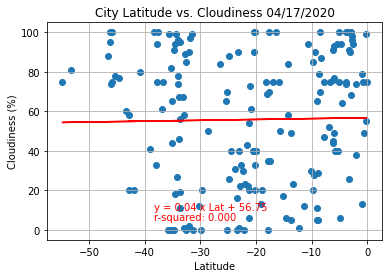

In [22]:
fit_plot(df_southern["Lat"], df_southern["Cloudiness"], "Cloudiness", "%", "cloudiness_south")

Cloudiness in the Southern Hemisphere has no correlation with the latitude whatsoever. $r^2=0$

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

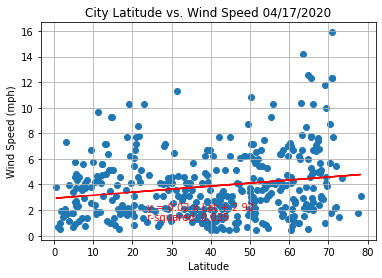

In [23]:
fit_plot(df_northern["Lat"], df_northern["Wind Speed"], "Wind Speed", "mph", "wind_speed_north")

Wind Speed in the Northern Hemisphere slightly increases with the latitude but the r-squared is very low (0.033). A very weak correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

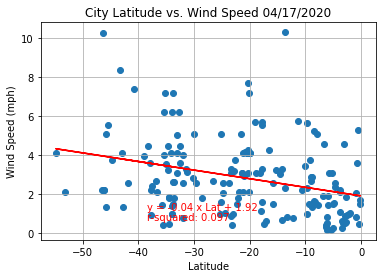

In [24]:
fit_plot(df_southern["Lat"], df_southern["Wind Speed"], "Wind Speed", "mph", "wind_speed_south")

In the Southern Hemisphere the Wind Spead has a similarly weak correlation ($ r^2 = 0.097 $). But the slope is negative which mirrors the Northern Hemisphere - "interesting" (as in taste of food that you don't want to eat).